<a href="https://colab.research.google.com/github/PaulErpen/Machine-Learning-Exercise-1/blob/main/Group24_Exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning: Exercise 1
Group 24: Jasmin Wolff (12114335), Mihai Truta (12122518), Paul Erpenstein (12107369)

In [46]:
import multiprocessing
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import pandas
import numpy
import time
from sklearn import metrics
from yellowbrick.classifier import ConfusionMatrix
from matplotlib import pyplot as plt
from google.colab import output
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Performance measures

We will use different performance measures to compare the performance of the different machine lerning solutions.
These performance measures are:
* Accurancy
* Precision
* Recall
* Specificity
* F1-Score

In order to evaluate the machine learning solutions we will also be using confusion matrices as a visualization of the classification results.

# Data set 1: Location 

First data set from the kaggle competition.

In [4]:
df_locations = pandas.read_csv("/content/gdrive/MyDrive/data/locations.csv")
print(df_locations.head())
print("This data set has {} observations.".format(df_locations.shape[0]))

   ID  class  1  2  3  4  5  6  7  ...  438  439  440  441  442  443  444  445  446
0   0     11  0  0  0  1  1  0  0  ...    0    0    0    1    0    0    0    0    0
1   1      3  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0    0
2   2      9  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0    0
3   3      8  0  0  0  1  0  0  0  ...    0    0    0    1    0    0    0    0    0
4   4      3  0  1  0  0  0  0  0  ...    0    0    0    0    0    1    0    0    0

[5 rows x 448 columns]
This data set has 4000 observations.


Each of these observations represents a person. There are 446 binary attributes, which denote wether a person has visited a specific location or not. Every person also belongs to a class. The task is to determine a persons class based on the places they visited.

In [5]:
df_location_performance_measures = pandas.DataFrame(
    columns = ["solution", "accurancy", "precision", "recall", "f1"])

## Exploration & Preprocessing

In [6]:
df_locations.isnull().sum().sum()

0

There are no missing values in this data set and therefore no preprocessing needed.

In [7]:
print("There are {} unique classes a person can belong to.".format(len(df_locations["class"].unique())))

There are 30 unique classes a person can belong to.


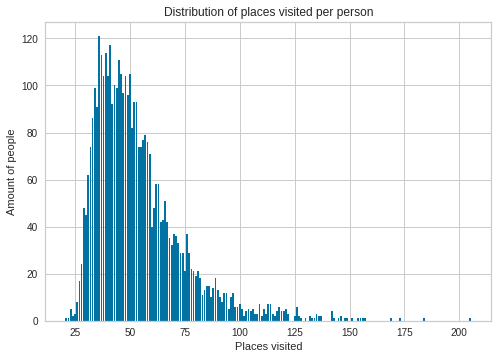

In [8]:
places_visited = df_locations.loc[:, '1':'446'].sum(axis=1) 
places_visited_distribution = places_visited.groupby(places_visited).count()
df_places_visited = pandas.DataFrame(data = {"nplaces" : places_visited_distribution.index, "countpeople": places_visited_distribution})
plt.bar(df_places_visited["nplaces"], df_places_visited["countpeople"])
plt.title("Distribution of places visited per person")
plt.ylabel("Amount of people")
plt.xlabel("Places visited")
plt.show()

A thing also worth considering is the amount of different places a person has visited. This might be a very predictive variable. This plot shows the amount of people grouped by how many places they have visited. There is a clear normal distribution, indicating that this measurement has a structure to it that might have predictive qualities.

In [ ]:
#df_locations["n_places_visited"] = df_locations.loc[:, '1':'446'].sum(axis=1) 

Turns out this decreases prediction performance.

### Train and test split



In [9]:
y = df_locations.copy(deep="true")["class"]
X = df_locations.copy(deep="true").drop('class', axis=1).drop('ID', axis=1)
ids = df_locations.copy(deep="true")["ID"]

X_train, X_test, y_train, y_test, ids_train, ids_test = train_test_split(X, y, ids, test_size=0.25, random_state=123)
print("The size of the training split is {} and the size of the test split is {}.".format(X_train.shape[0], X_test.shape[0]))

display(X_train)

The size of the training split is 3000 and the size of the test split is 1000.


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446
3238,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
791,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
523,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,...,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3733,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
242,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1122,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
1346,1,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3454,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3437,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0


### Scaling

In [ ]:
from sklearn import preprocessing

scaler_location = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler_location.transform(X_train)
X_test_scaled = scaler_location.transform(X_test)
display(X_train_scaled)

array([[-0.2503982 , -0.47063613, -0.23261778, ..., -0.26294023,
        -0.37507921, -0.2443281 ],
       [-0.2503982 , -0.47063613, -0.23261778, ..., -0.26294023,
        -0.37507921, -0.2443281 ],
       [-0.2503982 , -0.47063613, -0.23261778, ..., -0.26294023,
        -0.37507921, -0.2443281 ],
       ...,
       [-0.2503982 , -0.47063613, -0.23261778, ..., -0.26294023,
        -0.37507921, -0.2443281 ],
       [-0.2503982 , -0.47063613, -0.23261778, ..., -0.26294023,
        -0.37507921, -0.2443281 ],
       [-0.2503982 , -0.47063613, -0.23261778, ..., -0.26294023,
        -0.37507921, -0.2443281 ]])

## KNN

### Training

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k_range = range(1, 26)
scores = {}

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train_scaled, y_train)
  y_pred = knn.predict(X_test_scaled)
  scores[k] = metrics.accuracy_score(y_test, y_pred)

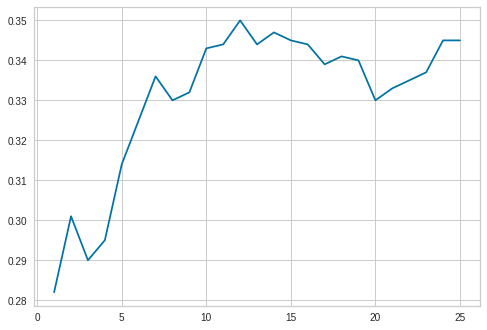

In [ ]:
plt.plot(list(scores.keys()), list(scores.values()))
plt.show()

In [ ]:
idx_max_accurancy = max(scores, key=scores.get)
print(idx_max_accurancy)
knn_best = KNeighborsClassifier(n_neighbors = idx_max_accurancy)
knn_best.fit(X_train_scaled, y_train)

21


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform')

### Evaluation

#### Confusion matrix

0.34375

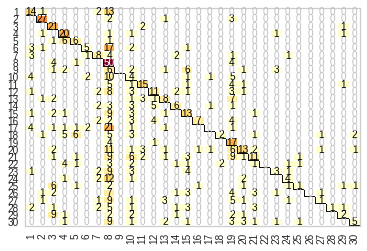

In [ ]:
cm = ConfusionMatrix(knn_best, classes=sorted(df_locations["class"].unique()))
cm.score(X_test_scaled, y_test)

Evaluation measures

In [ ]:
y_pred = knn_best.predict(X_test_scaled)
df_location_performance_measures = df_location_performance_measures.append({
    "solution": "KNN",
    "accurancy": metrics.accuracy_score(y_test, y_pred),
    "precision": metrics.precision_score(y_test, y_pred, average="micro"),
    "recall": metrics.recall_score(y_test, y_pred, average="micro"),
    "f1": metrics.f1_score(y_test, y_pred, average="micro")}, ignore_index=True)
display(df_location_performance_measures)

,solution,accurancy,precision,recall,f1
0,Neural Network,0.77125,0.77125,0.77125,0.77125
1,Decision Tree,0.27250,0.27250,0.27250,0.27250
2,KNN,0.34375,0.34375,0.34375,0.34375


## Neural Network/Multilayer Perceptron 

### Training

According to Heaton there is no theoratical basis for using a network with more than two layers [Heat08].

In [10]:
def fit_multilayer_perceptron(n_layers, n_neurons, X_train, y_train, X_test, y_test, queue):
  multi_layer_perceptron = MLPClassifier(solver='lbfgs', 
                                         random_state=123, 
                                         hidden_layer_sizes=numpy.repeat(n_neurons, repeats=n_layers))
  multi_layer_perceptron.fit(X_train, y_train)
  y_pred = multi_layer_perceptron.predict(X_test)
  queue.put((n_layers, n_neurons, metrics.accuracy_score(y_test, y_pred)))

queue = multiprocessing.Queue()
ps = []

print("Starting processes")

for n_layers in range(1, 3, 1):
  for n_neurons in range(30, 800, 40):
    p = multiprocessing.Process(target=fit_multilayer_perceptron, 
                args=(n_layers, n_neurons, X_train, y_train, X_test, y_test, queue))
    p.start()
    ps.append(p)

total = len(ps)
arr = []

print("Started processes")

with output.use_tags('status_text'):
  print("0% progress...")
  while len(ps) > 0:
    pids = []
    for p in ps:
      if not p.is_alive():
        arr.append(queue.get())
        pids.append(p.pid)
    ps = list(filter(lambda p: p.pid not in pids, ps))
    if len(pids) > 0:
      output.clear(output_tags='status_text', wait=True)
      print("{}% progress...".format(round((1 - len(ps) / float(total)) * 100), 1))
    time.sleep(1)
  output.clear(output_tags='status_text', wait=True)
  print("Finished all processes")

df_neural_netowrk_res = pandas.DataFrame.from_records(arr, columns=["n_layers", "n_neurons", "accurancy"])

Starting processes
92.5% progress...
95.0% progress...
97.5% progress...
100.0% progress...


In [11]:
with pandas.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_neural_netowrk_res)

    n_layers  n_neurons  accurancy
0          1         30      0.679
1          1         70      0.724
2          1        110      0.732
3          1        150      0.745
4          2         30      0.634
5          1        230      0.755
6          1        190      0.719
7          1        310      0.749
8          1        270      0.733
9          1        390      0.743
10         2         70      0.701
11         1        350      0.740
12         1        430      0.749
13         2        110      0.700
14         1        470      0.750
15         1        510      0.753
16         1        550      0.735
17         1        630      0.743
18         1        670      0.737
19         1        590      0.766
20         1        750      0.769
21         1        790      0.751
22         1        710      0.750
23         2        190      0.734
24         2        230      0.717
25         2        150      0.724
26         2        270      0.736
27         2        

20
20


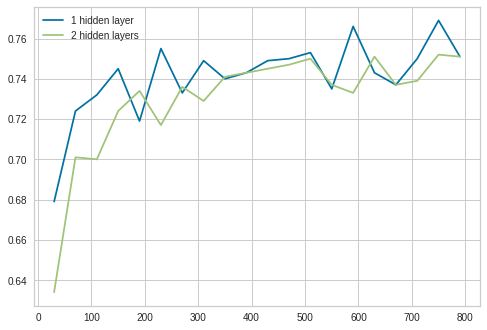

In [52]:
df_nn_1 = df_neural_netowrk_res[df_neural_netowrk_res["n_layers"] == 1].sort_values("n_neurons")
df_nn_2 = df_neural_netowrk_res[df_neural_netowrk_res["n_layers"] == 2].sort_values("n_neurons")
print(df_nn_1.shape[0])
print(df_nn_2.shape[0])
plt.plot(df_nn_1["n_neurons"], df_nn_1["accurancy"], label="1 hidden layer")
plt.plot(df_nn_2["n_neurons"], df_nn_2["accurancy"], label="2 hidden layers")
plt.legend()
plt.show()

There are notable performance difference between a neural network with a single hidden layer and two hidden layers.
1 hidden layer results in quite a lot of volatility when changing the number of neurons. We can see that the performance makes drastic jumps even though the number of neurons was only increased by 30.
2 hidden layers are more stable. When changing the number of neurons, they do no react that dramatically.

The peaks of a neural network with 1 hidden layer are higher. Since we aim for a better classification accurancy we will go for a network with 430 neurons and a single hidden layer.

In [53]:
final_multi_layer_perceptron = MLPClassifier(solver='lbfgs', 
                                         random_state=123, 
                                         hidden_layer_sizes=(450,450,))
final_multi_layer_perceptron.fit(X_train, y_train)
y_pred = final_multi_layer_perceptron.predict(X_test)

### Evaluation

#### Confusion Matrix

0.753

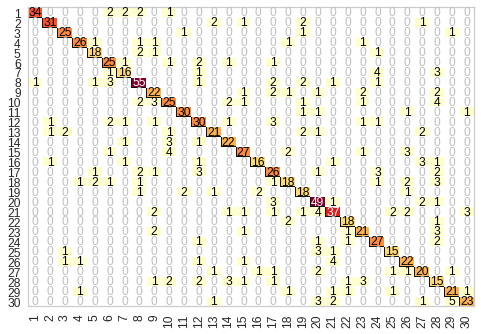

In [54]:
cm = ConfusionMatrix(final_multi_layer_perceptron, classes=sorted(df_locations["class"].unique()))
cm.score(X_test, y_test)

#### Evaluation measures

In [17]:
df_location_performance_measures = df_location_performance_measures.append({
    "solution": "Neural Network",
    "accurancy": metrics.accuracy_score(y_test, y_pred),
    "precision": metrics.precision_score(y_test, y_pred, average="weighted"),
    "recall": metrics.recall_score(y_test, y_pred, average="weighted"),
    "f1": metrics.f1_score(y_test, y_pred, average="weighted")}, ignore_index=True)
display(df_location_performance_measures)

,solution,accurancy,precision,recall,f1
0,Neural Network,0.749,"[0.75, 0.9393939393939394, 0.8620689655172413,...","[0.7317073170731707, 0.8378378378378378, 0.892...","[0.7407407407407408, 0.8857142857142858, 0.877..."
1,Neural Network,0.749,0.753508,0.746692,0.745365
2,Neural Network,0.749,0.757306,0.749,0.749027


## Decision Tree

### Training

In [ ]:
from sklearn import tree

decision_tree = tree.DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
print("The prediciton accurancy for the decision tree is {}.".format(metrics.accuracy_score(y_test, y_pred)))

The prediciton accurancy for the decision tree is 0.2725.


### Evaluation


#### Confusion Matrix

0.2725

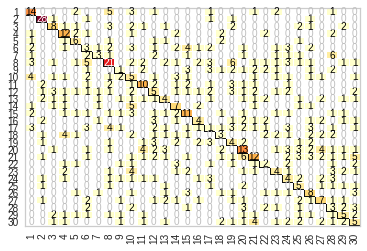

In [ ]:
cm = ConfusionMatrix(decision_tree, classes=sorted(df_locations["class"].unique()))
cm.score(X_test, y_test)

#### Evaluation measures

In [ ]:
df_location_performance_measures = df_location_performance_measures.append({
    "solution": "Decision Tree",
    "accurancy": metrics.accuracy_score(y_test, y_pred),
    "precision": metrics.precision_score(y_test, y_pred, average="samples"),
    "recall": metrics.recall_score(y_test, y_pred, average="samples"),
    "f1": metrics.f1_score(y_test, y_pred, average="samples")}, ignore_index=True)
display(df_location_performance_measures)

,solution,accurancy,precision,recall,f1
0,Neural Network,0.77125,0.77125,0.77125,0.77125
1,Decision Tree,0.27250,0.27250,0.27250,0.27250


## Comparison

In [ ]:
display(df_location_performance_measures)

,solution,accurancy,precision,recall,f1
0,Neural Network,0.77125,0.77125,0.77125,0.77125
1,Decision Tree,0.27250,0.27250,0.27250,0.27250
2,KNN,0.34375,0.34375,0.34375,0.34375


Neural network seems to be the best. Lets take its predictions for the kaggle competition.

In [55]:
df_locations_kaggle = pandas.read_csv("/content/gdrive/MyDrive/data/test/location_test.csv")
display(df_locations_kaggle)
X_kaggle = df_locations_kaggle.copy(deep=True).drop('ID', axis=1)
full_multi_layer_perceptron = MLPClassifier(solver='lbfgs', 
                                         random_state=123, 
                                         hidden_layer_sizes=(450, 450,))
full_multi_layer_perceptron.fit(X_train.append(X_test), y_train.append(y_test))

y_pred_nn = full_multi_layer_perceptron.predict(X_kaggle)
df_location_kaggle = pandas.DataFrame({"ID": df_locations_kaggle["ID"], "class": y_pred_nn})
display(df_location_kaggle)
df_location_kaggle.to_csv("/content/gdrive/MyDrive/data/kaggle_submissions/location_submission.csv", index=False)

,ID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446
0,4000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
1,4001,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,4002,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4003,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
4,4004,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,5004,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1005,5005,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,...,0,0,1,1,1,0,0,0,1,0,0,0,1,0,0,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1006,5006,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1007,5007,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0


,ID,class
0,4000,22
1,4001,20
2,4002,6
3,4003,21
4,4004,19
...,...,...
1004,5004,8
1005,5005,20
1006,5006,10
1007,5007,20


# Data set 2: Congressional Voting

Second data set from the kaggle competition.

In [19]:
df_congress = pandas.read_csv("/content/gdrive/MyDrive/data/congressional.csv")
with pandas.option_context('display.max_columns', None):
  display(df_congress.head())
print("This data set has {} observations.".format(df_locations.shape[0]))

,ID,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,67,republican,n,y,n,y,y,y,y,n,n,n,y,y,y,y,n,y
1,338,democrat,y,n,y,n,n,n,y,y,y,n,n,n,n,n,y,y
2,35,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,y,y
3,122,republican,n,unknown,n,y,y,y,n,n,n,y,n,y,y,y,n,y
4,420,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,n,y


This data set has 4000 observations.


## Exploration & Preprocessing

This data set describes members of the American Congress. Every instance is a politician.

The following code block describes the different variables contained in the data set.

In [40]:
for col in df_congress[[column for column in df_congress.columns if column != "ID"]]:
  print("Column {} has {} as possible values.".format(col, df_congress[col].unique()))

Column class has ['republican' 'democrat'] as possible values.
Column handicapped-infants has ['n' 'y' 'unknown'] as possible values.
Column water-project-cost-sharing has ['y' 'n' 'unknown'] as possible values.
Column adoption-of-the-budget-resolution has ['n' 'y' 'unknown'] as possible values.
Column physician-fee-freeze has ['y' 'n' 'unknown'] as possible values.
Column el-salvador-aid has ['y' 'n' 'unknown'] as possible values.
Column religious-groups-in-schools has ['y' 'n' 'unknown'] as possible values.
Column anti-satellite-test-ban has ['y' 'n' 'unknown'] as possible values.
Column aid-to-nicaraguan-contras has ['n' 'y' 'unknown'] as possible values.
Column mx-missile has ['n' 'y' 'unknown'] as possible values.
Column immigration has ['n' 'y' 'unknown'] as possible values.
Column synfuels-crporation-cutback has ['y' 'n' 'unknown'] as possible values.
Column education-spending has ['y' 'n' 'unknown'] as possible values.
Column superfund-right-to-sue has ['y' 'n' 'unknown'] as po

There are only two political parties in this data set and therefore only two classes. This means that the task is a binary classification task.

There are 16 variables describing the political stances of the members of congress. These stances concern a topic or piece of legislation and the value is based on whether the politician is in agreement with that political stance. The classification target is the party of these politicians.

For each political stance the possible values are `yes`, `no` and `unknown`. The meaning of `yes` and `no` are clear. The value `unknown` is a lot more interesting since it means the data set contains missing values. There are multiple different ways to think about these unknown values: 

* **Missing completely at random**: The researchers were simply not able to find a source telling the political stance of that specific politician
* **Missing not at random**: The politicians consciously never made statements about the given political topic due to their own political reasons (f.e. no interest in the topic or avoiding controversy)

The second explanation would mean that the `unknown` values could be very telling. Therefore the variables should't be seen as binary, but rather as a third possible class. This means that we would have to perform one-hot-encoding on the variables.

In [49]:
ids_congress = df_congress.copy(deep=True)["ID"]
X_congress = pandas.get_dummies(df_congress.copy(deep=True).drop("ID", axis=1).drop("class", axis=1))
display(X_congress)
y_congress = df_congress.copy(deep=True)["class"].map(lambda x: x == "democrat" if 1 else 0)
display(y_congress)

,handicapped-infants_n,handicapped-infants_unknown,handicapped-infants_y,water-project-cost-sharing_n,water-project-cost-sharing_unknown,water-project-cost-sharing_y,adoption-of-the-budget-resolution_n,adoption-of-the-budget-resolution_unknown,adoption-of-the-budget-resolution_y,physician-fee-freeze_n,physician-fee-freeze_unknown,physician-fee-freeze_y,el-salvador-aid_n,el-salvador-aid_unknown,el-salvador-aid_y,religious-groups-in-schools_n,religious-groups-in-schools_unknown,religious-groups-in-schools_y,anti-satellite-test-ban_n,anti-satellite-test-ban_unknown,anti-satellite-test-ban_y,aid-to-nicaraguan-contras_n,aid-to-nicaraguan-contras_unknown,aid-to-nicaraguan-contras_y,mx-missile_n,mx-missile_unknown,mx-missile_y,immigration_n,immigration_unknown,immigration_y,synfuels-crporation-cutback_n,synfuels-crporation-cutback_unknown,synfuels-crporation-cutback_y,education-spending_n,education-spending_unknown,education-spending_y,superfund-right-to-sue_n,superfund-right-to-sue_unknown,superfund-right-to-sue_y,crime_n,crime_unknown,crime_y,duty-free-exports_n,duty-free-exports_unknown,duty-free-exports_y,export-administration-act-south-africa_n,export-administration-act-south-africa_unknown,export-administration-act-south-africa_y
0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1
1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1
2,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1
3,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1
4,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1
214,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0
215,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
216,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1


0      False
1       True
2       True
3      False
4       True
       ...  
213     True
214    False
215     True
216     True
217    False
Name: class, Length: 218, dtype: bool

### Train and Test split

In [51]:
X_congress_train, X_congress_test, y_congress_train, y_congress_test, ids_congress_train, ids_congress_test = train_test_split(X_congress, y_congress, ids_congress, test_size=0.3, random_state=123)

## Multilayer Perceptron

# Data set 3: COVID-19

The data set from exercise 0.

In [ ]:
df_covid = pandas.read_csv("/content/gdrive/MyDrive/data/covid.csv")
print(df_covid.head())

       id  sex  patient_type  ... contact_other_covid covid_res icu
0  16169f    2             1  ...                   2         1  97
1  1009bf    2             1  ...                  99         1  97
2  167386    1             2  ...                  99         1   2
3  0b5948    2             2  ...                  99         1   2
4  0d01b5    1             2  ...                  99         1   2

[5 rows x 23 columns]


# Data set 4: Airline customer satisfaction

A completely new data set for classifocation.

In [ ]:
df_airline = pandas.read_csv("/content/gdrive/MyDrive/data/airline.csv")
print(df_airline.head())

   Unnamed: 0      id  ... Arrival Delay in Minutes             satisfaction
0           0   70172  ...                     18.0  neutral or dissatisfied
1           1    5047  ...                      6.0  neutral or dissatisfied
2           2  110028  ...                      0.0                satisfied
3           3   24026  ...                      9.0  neutral or dissatisfied
4           4  119299  ...                      0.0                satisfied

[5 rows x 25 columns]


# Sources

[Heat08] Jeff Heaton. 2008. <i>Introduction to Neural Networks for Java, 2nd Edition</i> (2nd. ed.). Heaton Research, Inc.